<a href="https://colab.research.google.com/github/fathurrahmanyahyasatrio/fintechpart1/blob/main/Fintech%20Project%20Part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

- Part 1: We will thoroughly examine the business challenge and dedicate significant effort to analyze and preprocess the dataset.
- Part 2: We will construct the machine learning model, assess the performance, and gain insights into model decisions using interpretability techniques
- Part 3: We will create and refine various models to identify the most effective one.
- Part 4: We will develop a Neural Network Model, evaluate its the performance and compare it with the results obtained from previous models.
- Part 5: We will transition to practical implementation developing and making our best-performing model accessible to the public.

# Lending Introduction

The issue at hand is related to the lending process, where creditworthiness is assessed. Credit analysis evaluating the likelihood of an applicant repaying a loan promptly or facing default. There are two important concerns:
1. The potential loss of business revenue due to either rejecting qualified candidates or approving too few of them.
2. The financial loss incurred by approving applicants who ultimately fail to repay their loans.

As the number of loan applications reviewed by loan officers increases, these challenges become more complex. Manual approval processes are time-consuming, requiring extensive hours for each application. However, the company continually seeks way to optimize costs and enhance human productivity. This pursuit of efficiency can sometimes lead to human errors and biases since it's impractical to thoroughly assess a large number of applicants while considering all relevant factors.

**The Solution**

By using machine learning, we should be able to effective tackle these challenges. Firstly, semi-automate massive approval process, so that loan can officers can focus on the most important part of the application. Second, we can optimize the trade-off between reveneu

In [1]:
import pandas as pd
import random
from matplotlib import pyplot as plt

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

import seaborn as sns
import numpy as np # linear algebra

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
def countplot(indipendent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(loans[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

In [3]:
import seaborn as sns

def countplot(indipendent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(loans3[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

In [4]:
loan = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=True)

<ipython-input-4-6b6adaa88cbd>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=True)


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55585 entries, 0 to 55584
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 64.0+ MB


In [6]:
loans = loan[['loan_amnt', 'term','int_rate', 'sub_grade','emp_title',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl']]

- loan_amnt: The listed amount of the loan applied by the borrower. This feature can provide information about the borrower's financial need. Higher loan amounts might indicate a greater financial burden, which could affect the likelihood of repayment.

- term: The number of payments on the loan, where values are in months and can be either 36 or 60. The term of the loan can influence the borrower's ability to repay. Longer terms may have lower monthly payments but could result in higher interest payments over time.

- int_rate: The interest rate on the loan. Higher interest rates typically lead to higher overall loan costs. Borrowers with higher interest rates might have a greater risk of default if their financial situation is not stable.

- sub_grade: Assigned loan subgrade score based on the borrower's credit history. Subgrades can provide a more granular assessment of the borrower's creditworthiness beyond the FICO score. Higher subgrades (e.g., A or B) may indicate lower credit risk, while lower subgrades (e.g., E or F) may indicate higher risk.

- emp_length: Borrower's employment length in years. The length of employment can be an important factor in assessing a borrower's stability and ability to repay the loan. Longer employment history may indicate greater job security.

- home_ownership: The homeownership status provided by the borrower (e.g., rent, own, mortgage, etc). Homeownership status can provide insight into the borrower's financial stability and responsibility.

- annual_inc: The self-reported annual income provided by the borrower. Income is a crucial factor in determining a borrower's ability to make loan payments. Higher incomes generally imply a lower risk of default.

- addr_state: The state provided by the borrower in the loan application. This might provide information about the borrower's geographic location, which can be relevant for assessing economic conditions and regional factors that affect repayment.

- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage, divided by the borrower’s monthly income. This measures the borrower's debt-to-income ratio, which is important for evaluating their capacity to take on additional debt.

- mths_since_recent_inq: Months since most recent inquiry. This feature can indicate recent credit behavior. Borrowers with frequent recent inquiries may be actively seeking credit, which could impact their ability to manage additional debt.

- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. High utilization may indicate a borrower who is close to maxing out their credit lines, potentially signaling financial stress.

- bc_open_to_buy: Total open to buy on revolving bankcards. This reflects the available credit a borrower has on their bankcards, which can impact their capacity to handle additional debt.

- bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts. High utilization of available credit could be a sign of financial strain.

- num_op_rev_tl: Number of open revolving accounts. This represents the borrower's credit history and the number of open credit lines they have.

- loan_status: The target label we want to predict. It has two main values: "Fully paid" or "Charged-off," which indicate whether the borrower successfully repaid the loan or defaulted.

These features provide a diverse set of information about the borrower's financial situation, credit history, and behavior, which can be used to build a predictive model to assess the likelihood of loan repayment or charge-off. Machine learning models can analyze these features to make predictions and assist in loan approval or rejection decisions.

In [7]:
loans.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl
0,3600.0,36 months,13.99,C4,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,PA,5.91,4.0,29.7,1506.0,37.2,4.0
1,24700.0,36 months,11.99,C1,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,SD,16.06,0.0,19.2,57830.0,27.1,20.0
2,20000.0,60 months,10.78,B4,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,IL,10.78,10.0,56.2,2737.0,55.9,4.0
3,35000.0,60 months,14.85,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Current,NJ,17.06,NaN,11.6,54962.0,12.1,10.0
4,10400.0,60 months,22.45,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,PA,25.37,1.0,64.5,4567.0,77.5,7.0



We observe that the loan amounts are generally in the thousands of US dollars range, loan terms are commonly 36 or 60 months, and sub_grade is categorized alphabetically, among other details. We will explore these aspects in more depth later, but for now, this overview provides us with a basic understanding of the dataset.

While individual values can offer insights for specific observations, it's also beneficial to examine general statistical summaries using the "describe()" function. It's important to note that this function performs calculations only for numerical features.

In [8]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [9]:
loans.describe()

,loan_amnt,int_rate,annual_inc,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl
count,55585,55585,55585,55584,49764,55560,55066,55035,55584
mean,15019,12,79010,19,7,52,10313,61,8
std,8668,4,97443,10,6,24,15643,28,5
min,1000,5,0,0,0,0,0,0,0
25%,8000,9,48000,13,2,34,1478,39,5
50%,13975,12,66000,19,5,52,4810,63,7
75%,20000,14,95000,26,10,70,12453,85,11
max,35000,29,9000000,999,24,146,263953,167,66



Allow me to clarify the meaning of the information above:

- Count: Indicates the total count or number of values present for the given variable.
- Mean: Represents the average or arithmetic mean of the variable, which is calculated by summing all values and dividing by the count.
- Min: Denotes the smallest or minimum value observed within the variable.
- Max: Indicates the largest or maximum value observed within the variable.
- Std: Stands for the standard deviation, which measures how much the values within the variable deviate or differ from the mean. It provides information about the spread or variability of the data.
- IQR: Represents the interquartile range, which highlights the values of the variable at specific percentiles, namely the 25th percentile (Q1), 50th percentile (Q2, also known as the median), and 75th percentile (Q3). The IQR is a measure of the spread of data within the middle 50% of observations and helps assess data distribution.

# Missing Data

In [10]:
loans.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
sub_grade                   0
emp_title                3373
emp_length               3363
home_ownership              0
annual_inc                  0
loan_status                 0
addr_state                  0
dti                         1
mths_since_recent_inq    5821
revol_util                 25
bc_open_to_buy            519
bc_util                   550
num_op_rev_tl               1
dtype: int64

In [11]:
missing_data = pd.DataFrame({'total_missing': loans.isnull().sum(), '%_missing':
(loans.isnull().sum()/2260701)*100})
missing_data

,total_missing,%_missing
loan_amnt,0,0
term,0,0
int_rate,0,0
sub_grade,0,0
emp_title,3373,0
emp_length,3363,0
home_ownership,0,0
annual_inc,0,0
loan_status,0,0
addr_state,0,0


We can see that most of the features do not contain many missing values, most of them are well under 5%. We don’t need to drop any of the features, but we need to handle these missing values, before fitting the model.

While handling the missing data, these are some popular techniques to do it:

1. Delete rows with missing values. This typically gives you a robust model, but a lot of data is lost. Depending on the missing values %, this may not be feasible. You should also remember — it is not advisable to drop observations as it may distort your understanding and future predictions about the population, as you are removing these groups of populations.

2. Impute missing values for continuous/ categorical features. For continuous features, you can replace missing values with mean and median. For categorical features, you can replace them with the most frequent category. This helps to prevent data loss as it happens in the rows deletion method, but the model may result in poor performance, as these simple calculations might not correctly describe the missing value.

3. More complex techniques like predicting a missing value with a model or some algorithms/ libraries like XGBoost can factor in the missing values and handle it out of the box.

Considering that the amount of missing values is not high in our case, and the dataset number of observations is substantial (~2 million), let’s simply drop the missing values rows.

In [12]:
loans = loans.dropna()
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46326 entries, 0 to 55583
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              46326 non-null  float64
 1   term                   46326 non-null  object 
 2   int_rate               46326 non-null  float64
 3   sub_grade              46326 non-null  object 
 4   emp_title              46326 non-null  object 
 5   emp_length             46326 non-null  object 
 6   home_ownership         46326 non-null  object 
 7   annual_inc             46326 non-null  float64
 8   loan_status            46326 non-null  object 
 9   addr_state             46326 non-null  object 
 10  dti                    46326 non-null  float64
 11  mths_since_recent_inq  46326 non-null  float64
 12  revol_util             46326 non-null  float64
 13  bc_open_to_buy         46326 non-null  float64
 14  bc_util                46326 non-null  float64
 15  nu

In [13]:
missing_data = pd.DataFrame({'total_missing': loans.isnull().sum()})
missing_data

,total_missing
loan_amnt,0
term,0
int_rate,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0
loan_status,0
addr_state,0


# Univariate Analysis

In the next step, let’s deep dive into each feature and understand what’s going on inside of it. The univariate analysis will help us to tackle this.

What is Univariate Analysis and why do I care?

The univariate analysis help to explore each feature in a dataset, we don’t look into the relationship between features, but just focus on one feature at a time. We look at the range of values, as well as the central tendency of the values, their outliers, and so on.

Two major components that we deal with while performing this analysis:

Outliers. Outlier is a data point that differs significantly from other observations. Outliers distort the feature distribution and ML work significantly, we need to observe and form a strategy to deal with them. Business-wise, you should aim to understand why there is an outlier, and either you can remove it. For example, if you have a feature that represents the height of a person, and one of the observations contain, instead of a number, a string with a weird value like = “abc cm”, and since the height cannot contain such value, it is safe to drop it. Not all the ML work is impacted by outliers, for some algorithms you can safely ignore outliers, but it is still important to understand your data.

Outliers Sensitive Algorithms: Linear Regression, Logistic Regression, Support Vector Machine
Outliers Immune Algorithms: All tree-based or complex algorithms
Skewness. Skewness refers to data distortion or symmetry/ asymmetry of data distribution. When your data is skewed, the value of the mean and the median is different. Skewness violates the normality assumption of some ML models, for example, linear regression, that may have misleading results. Some models like tree-based are immune to skewness, however it limits your possibilities in trying other models:

Skewness Sensitive: Linear Regression, Logistic Regression — less sensitive than linear regression and may benefit from transformation in some cases
Skewness Immune: All tree-based or complex algorithms
How do I deal with outliers?

Typically you are ok to drop an outlier in these cases:

You know that it’s wrong. For example, if you have a really good sense of what range the data should fall in, like people’s ages, you can safely drop values that are outside of that range.
You can go back and recollect or verify the questionable data points.
However, you shouldn’t drop outliers If, for example, 20%-40% of your data is outliers, then it should not necessarily be treated as an outlier, instead, you should look further into it to understand it.

Let’s plot each feature distribution using matplot library as a visualization tool:

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>]], dtype=object)

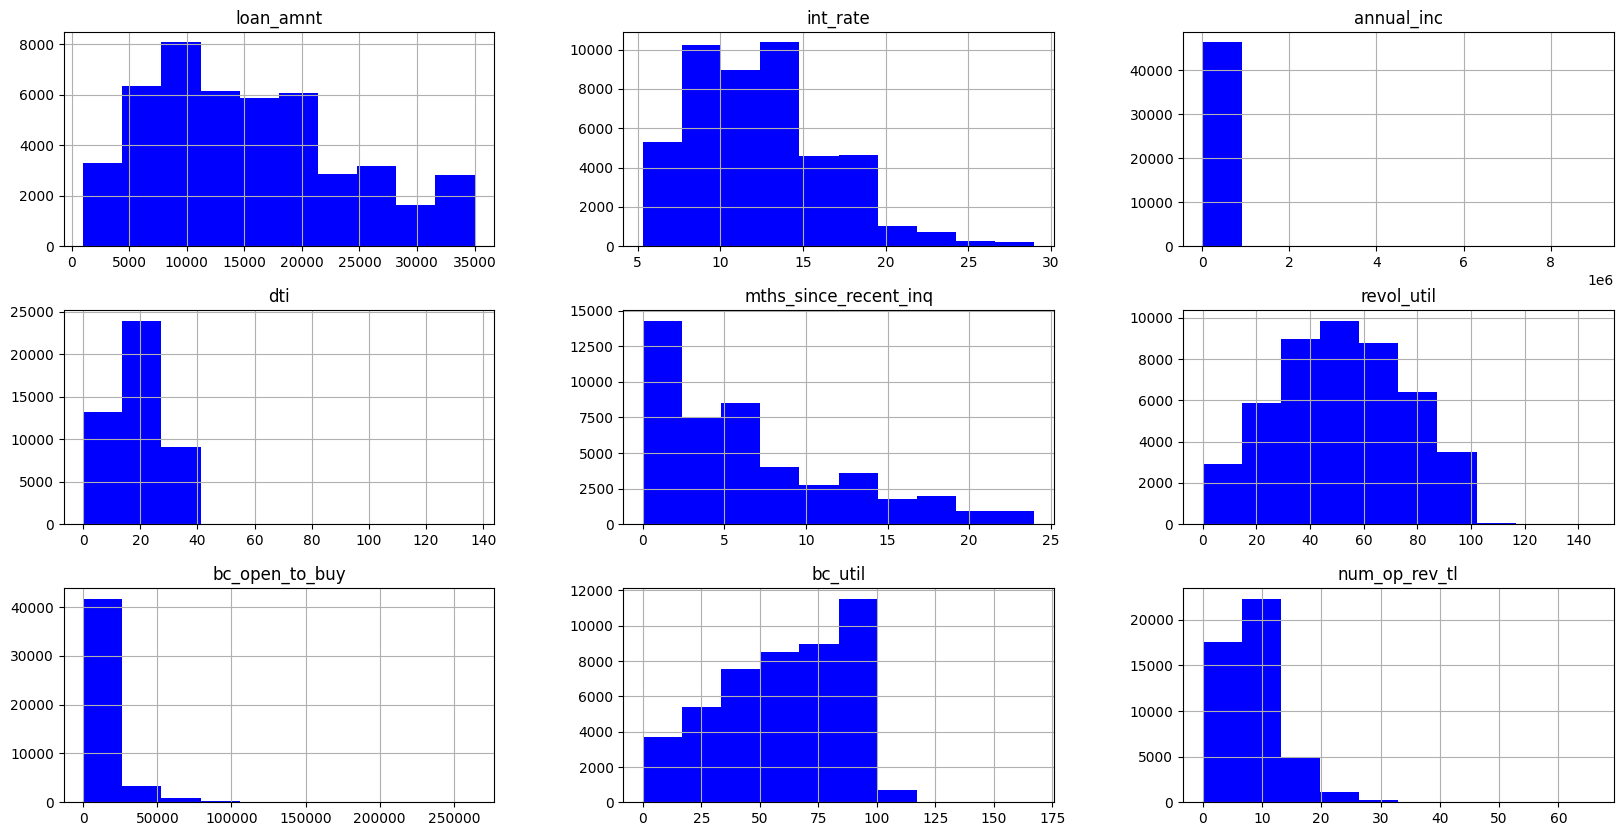

In [14]:
loans.hist(bins = 10, figsize = (20,10), color = 'b')

We can see that annual_inc, dti, revol_util, bc_open_to_buy, bc_util, num_op_rev_ti have clear outliers out of core observations. Let's zoom in those. We can also observe that most of the distributions are having moderate to highly positive skewness. Since the outliers impact the distribution, let's review it again after dealing with the outliers.

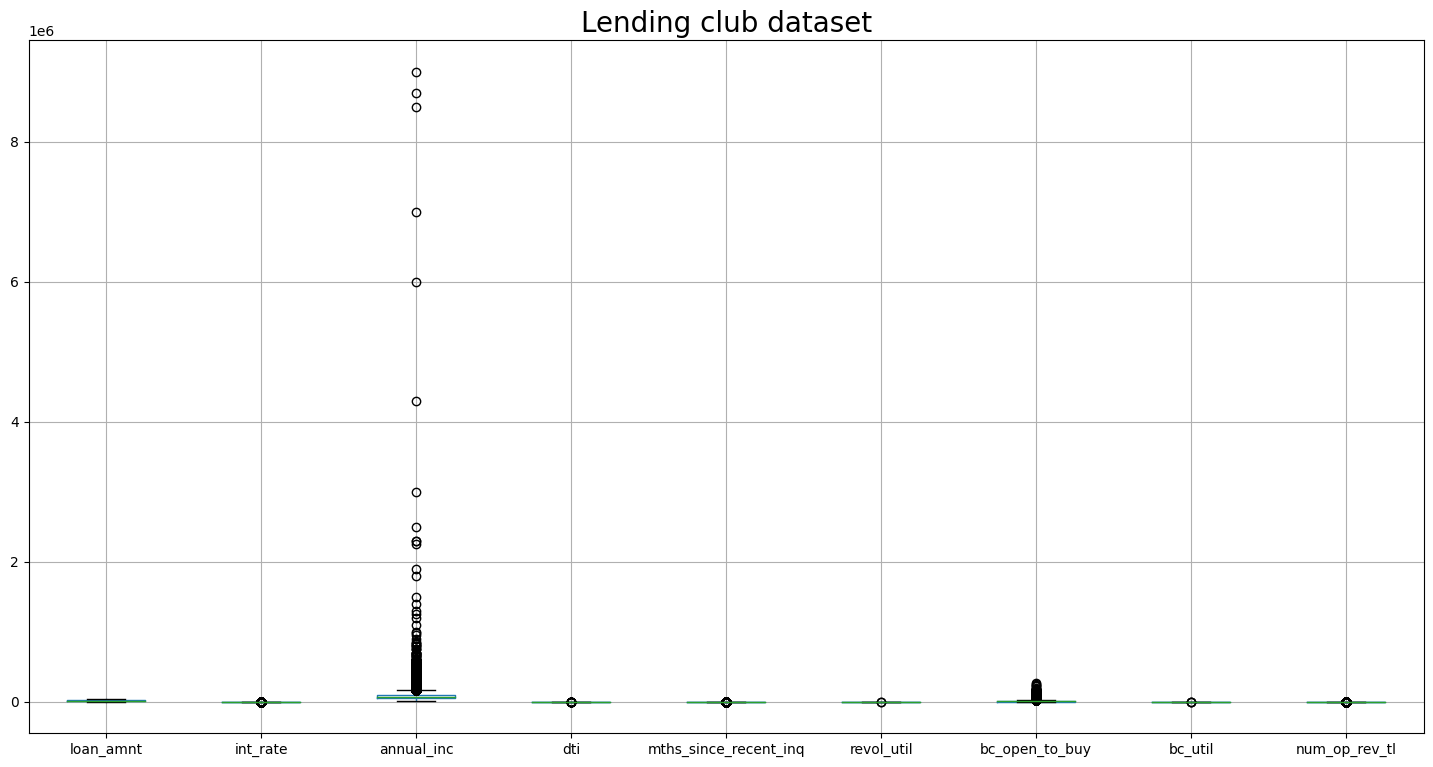

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
num_cols = ['loan_amnt', 'term','int_rate', 'sub_grade',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl' ]
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.title("Lending club dataset", fontsize=20)
plt.show()

**Remove outlier annual income**

In [16]:
loans.annual_inc.describe()

count     46326
mean      81830
std      103037
min        3800
25%       50000
50%       70000
75%       97366
max     9000000
Name: annual_inc, dtype: float64

From the output above there is a max value of annual_inc 11 MM USD which is likely not describing our population of people who apply for loans and business-wise we may not need to predict such cases, this logic gives us the confidence to drop it.

In [17]:
loans.annual_inc.unique()

array([55000., 65000., 63000., ..., 32800., 40840., 98952.])

Another way of analyzing outliers is to build a box plot chart to classify and view outliers as data points that are 1.5 times above the third quartile or below the first quartile on the box plot. This is how we can do that:

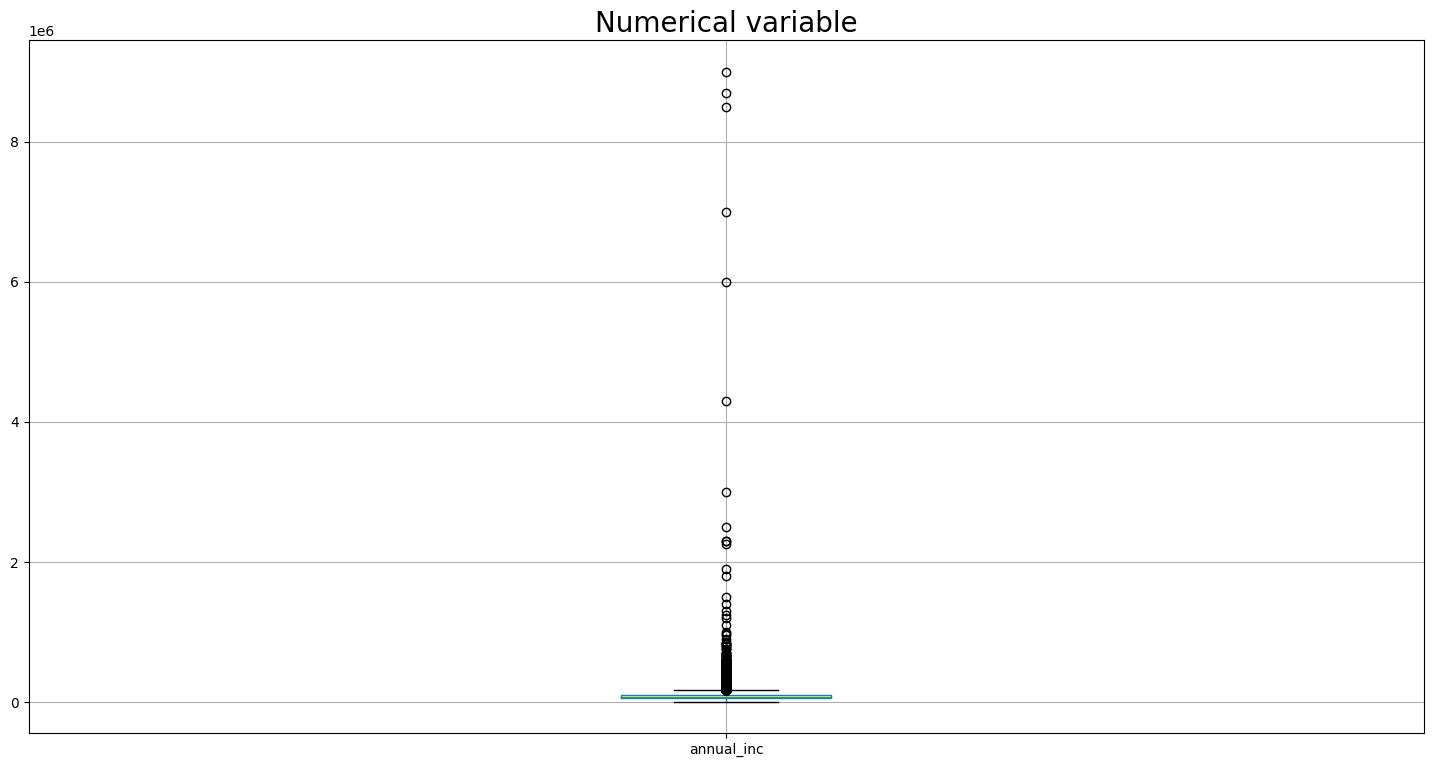

In [18]:
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [19]:
#remove outlier "annual income"
q_low = loans["annual_inc"].quantile(0.08)
q_hi  = loans["annual_inc"].quantile(0.92)

loans = loans[(loans["annual_inc"] < q_hi) & (loans["annual_inc"] > q_low)]

Two outliers of 11 and 6 MM USD squeeze the income range completely, let’s drop these:

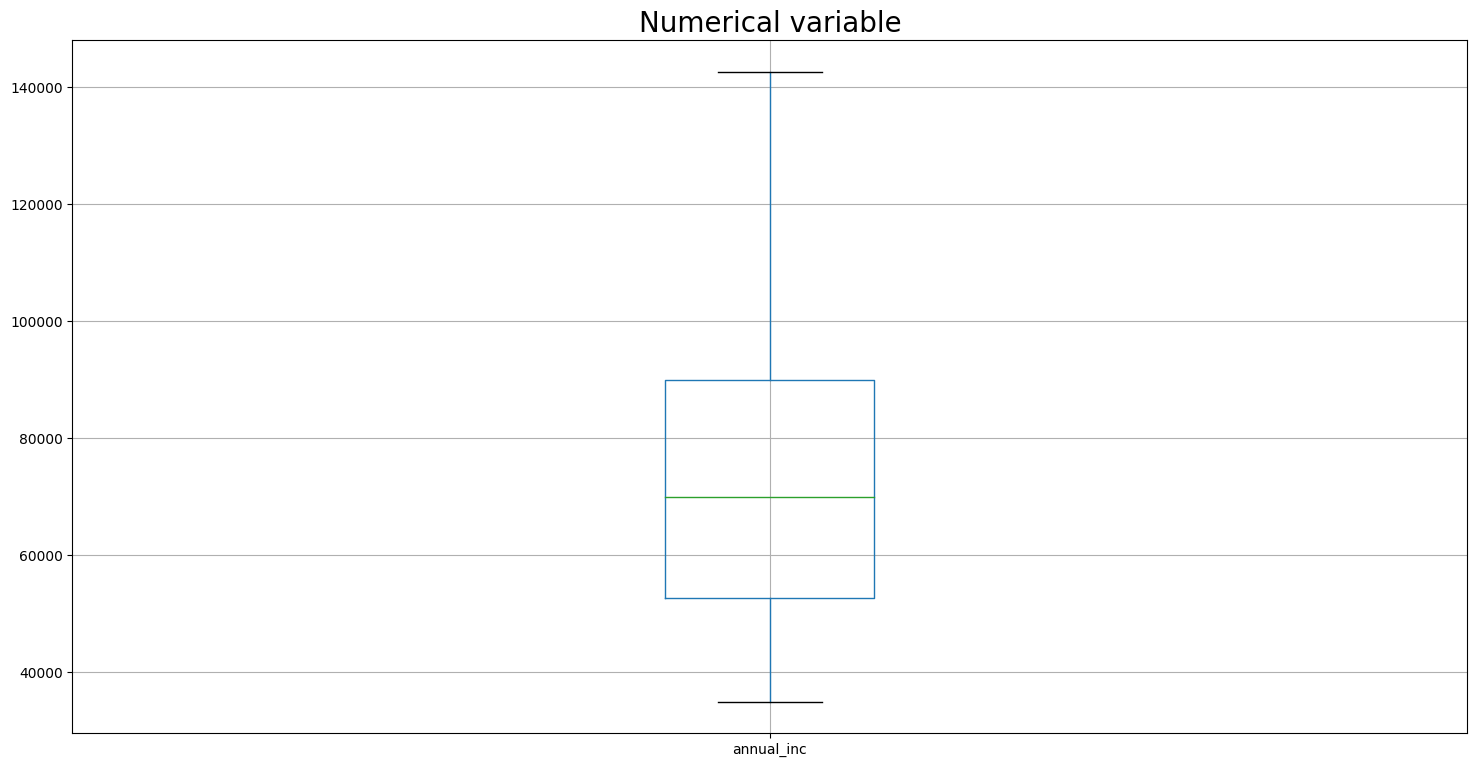

In [20]:
# plot a chart to view to what extend outliers are removed
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()


The box plot has significantly improved; there are no outliers beyond the range we previously discussed. It's worth noting that we used the winzorization method to eliminate extreme outliers. Nevertheless, it's essential to be vigilant when dealing with a higher number of outliers.

I won't go into the details of applying the same method to all the features, but here are the results if we do follow the same approach:

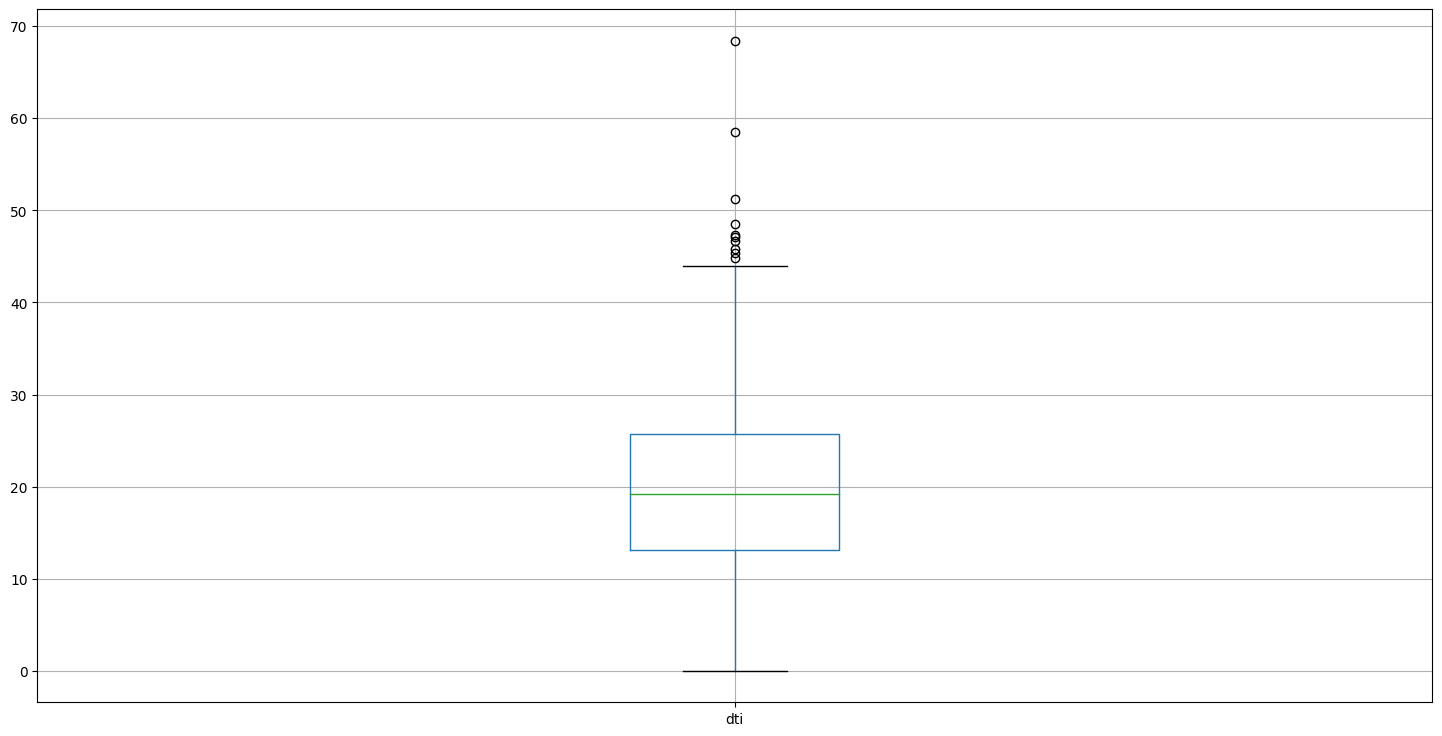

In [21]:
num_cols = ['dti']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [22]:
#remove outlier

loans = loans[(loans['dti'] <=45)]

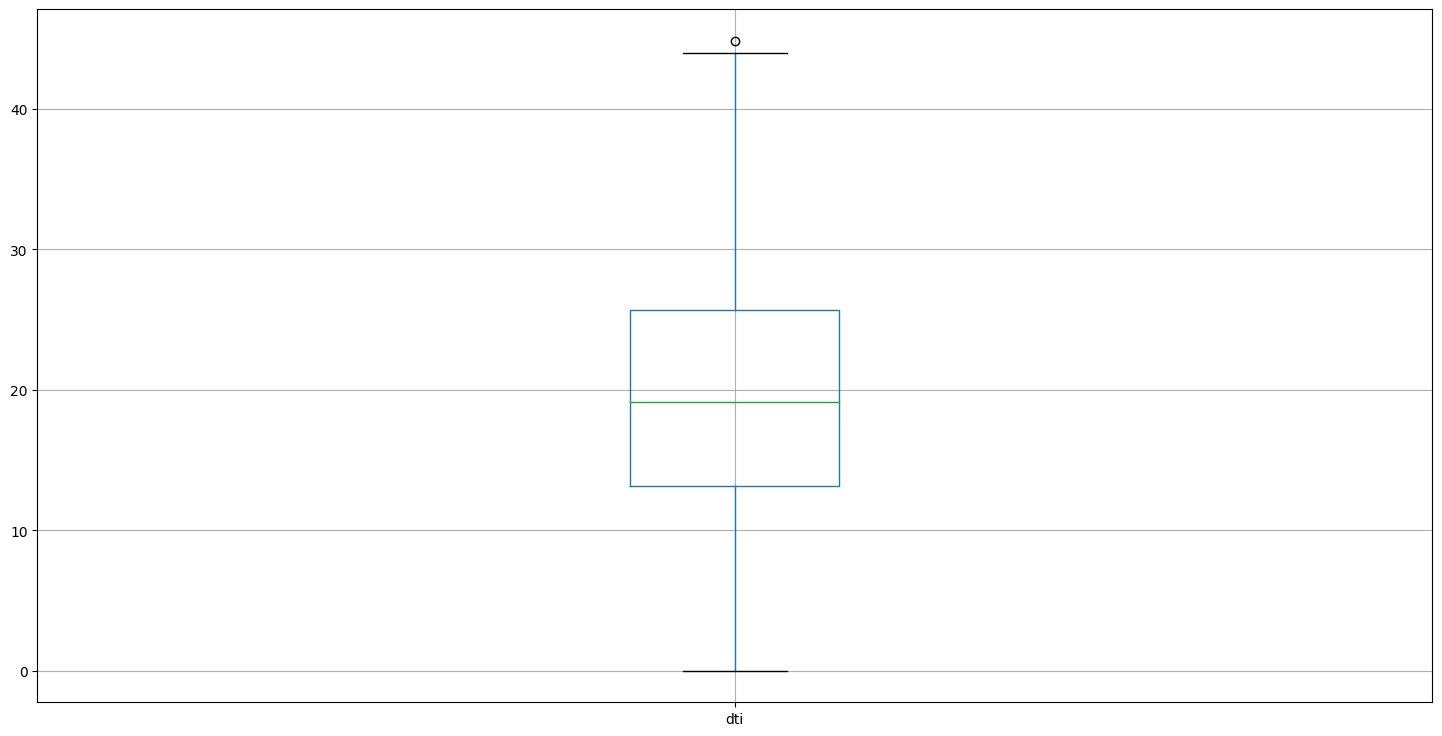

In [23]:
num_cols = ['dti']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>]], dtype=object)

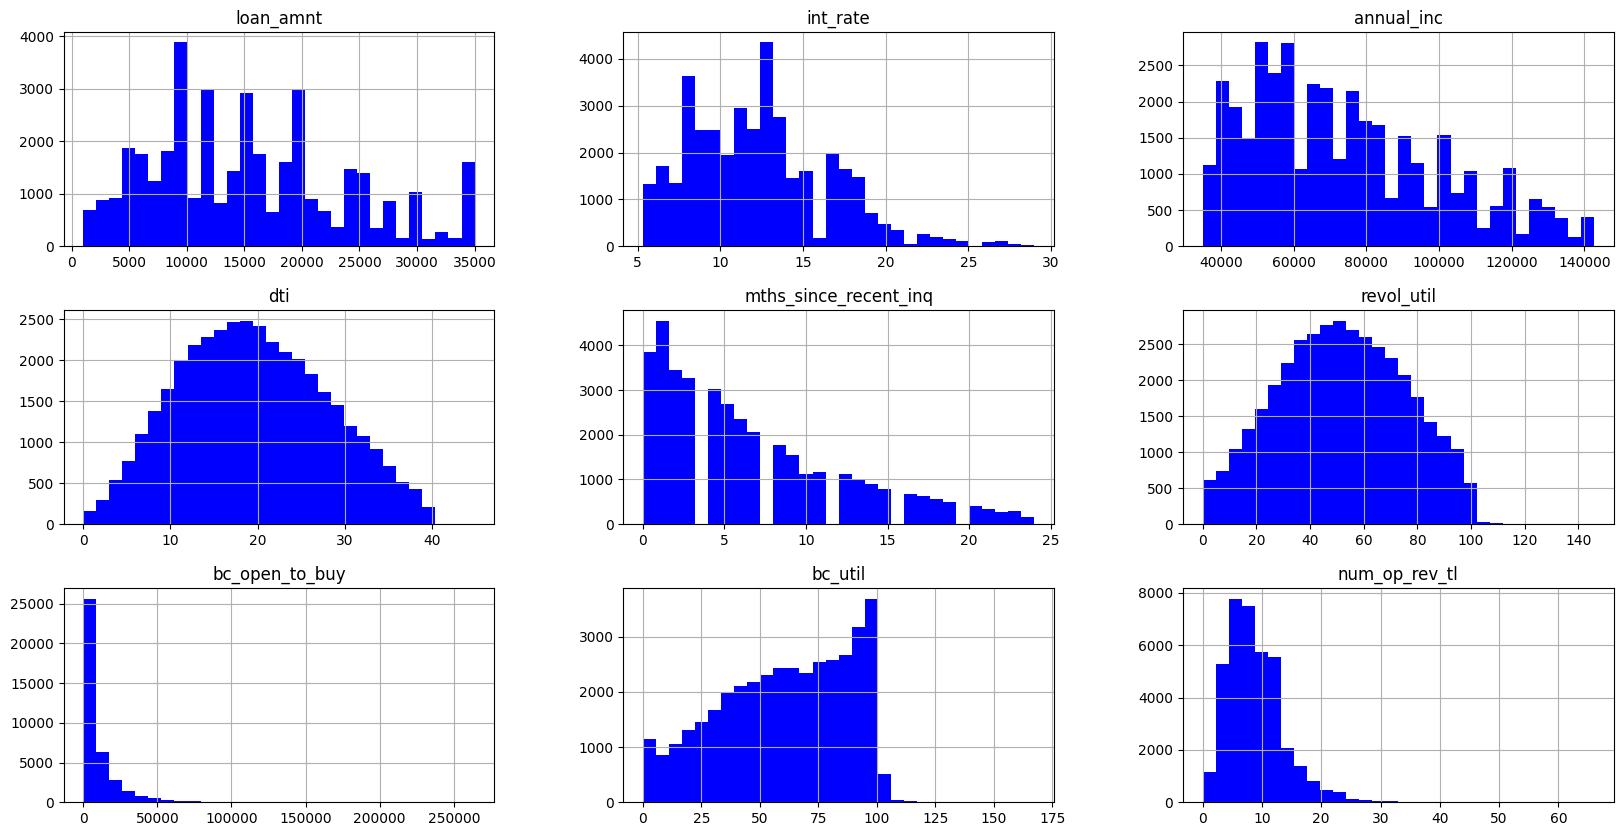

In [24]:
loans.hist(bins = 30, figsize = (20,10), color = 'b')

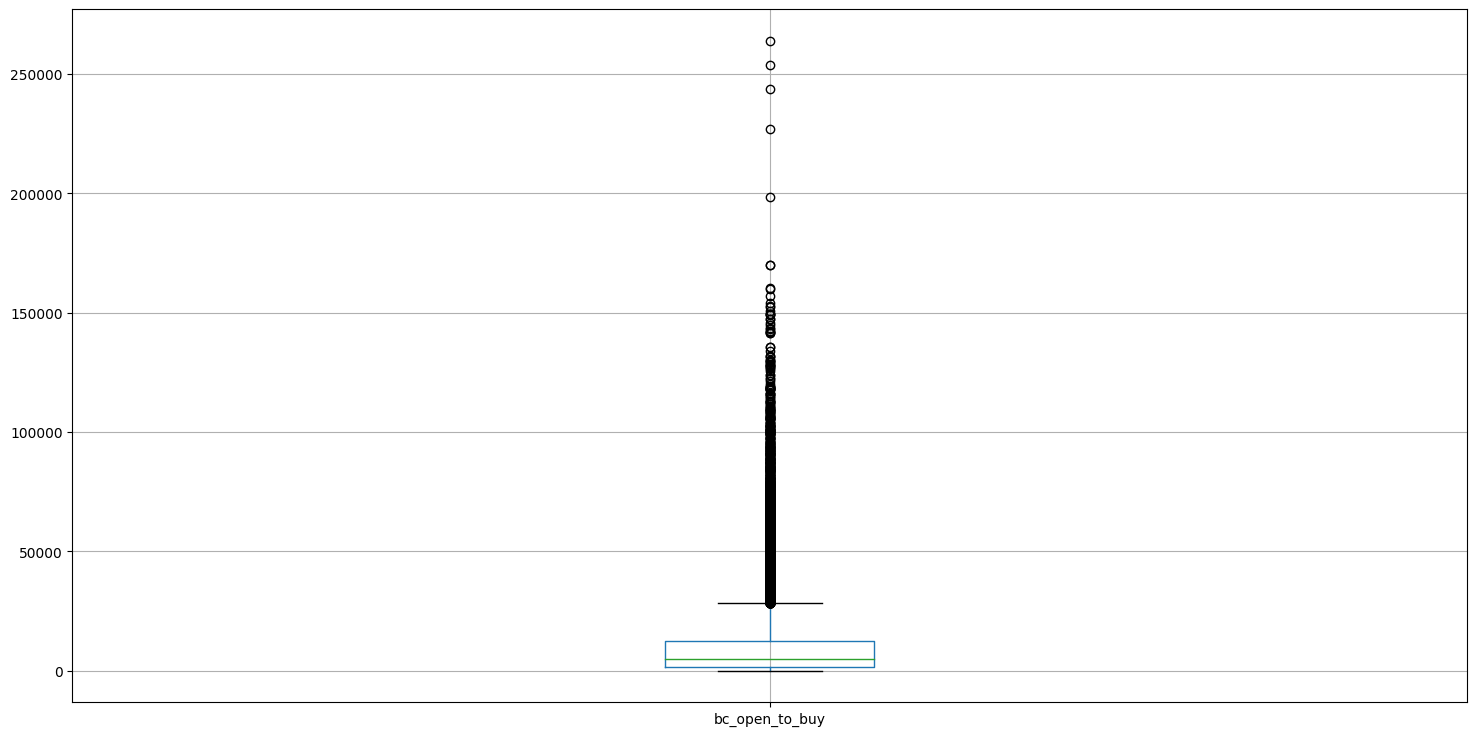

In [25]:
num_cols = ['bc_open_to_buy']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [26]:
#remove outlier
q_hi  = loans['bc_open_to_buy'].quantile(0.95)
loans = loans[(loans['bc_open_to_buy'] < q_hi)]

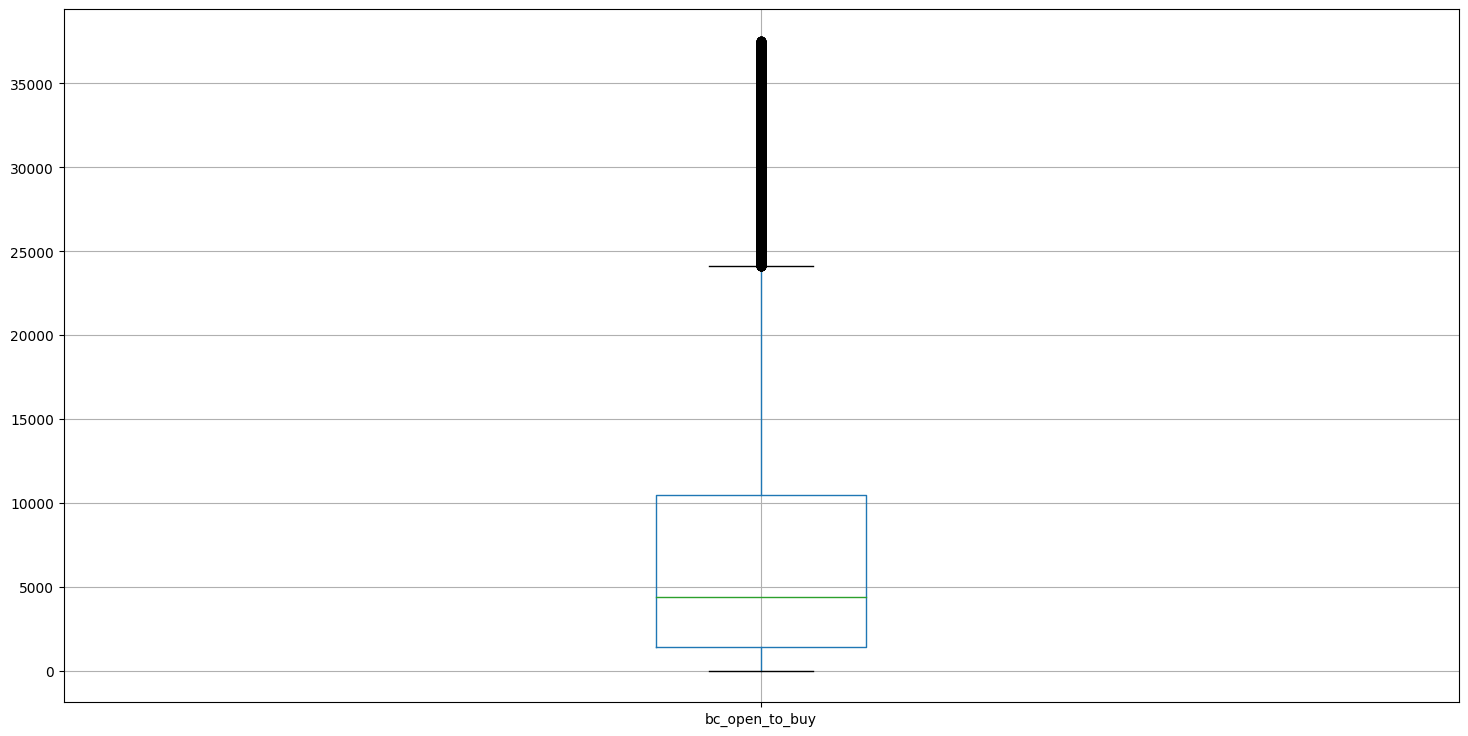

In [27]:
num_cols = ['bc_open_to_buy']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>]], dtype=object)

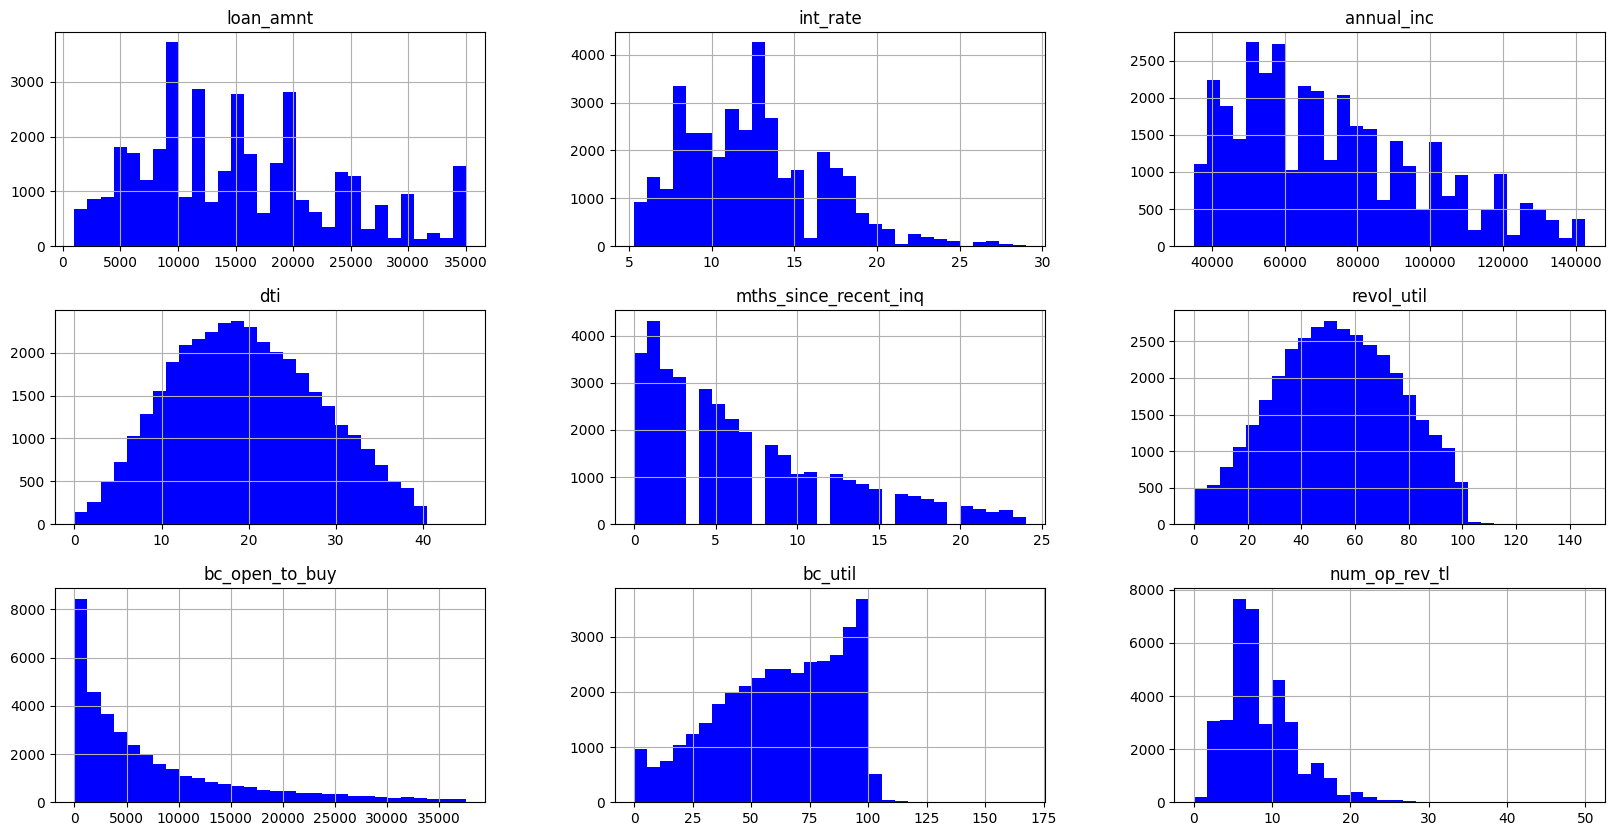

In [28]:
loans.hist(bins = 30, figsize = (20,10), color = 'b')

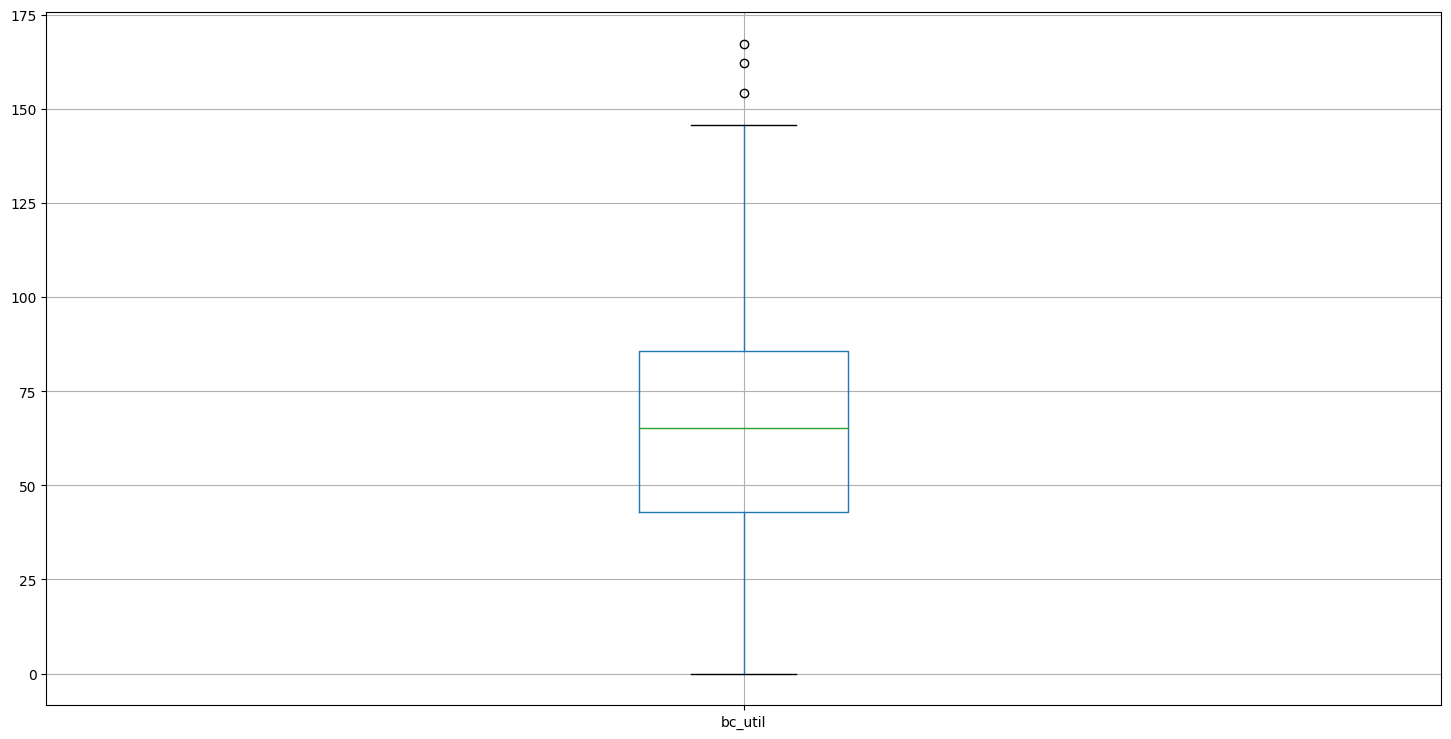

In [29]:
num_cols = ['bc_util']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [30]:
#remove outlier
loans = loans[(loans['num_op_rev_tl'] <=35)]

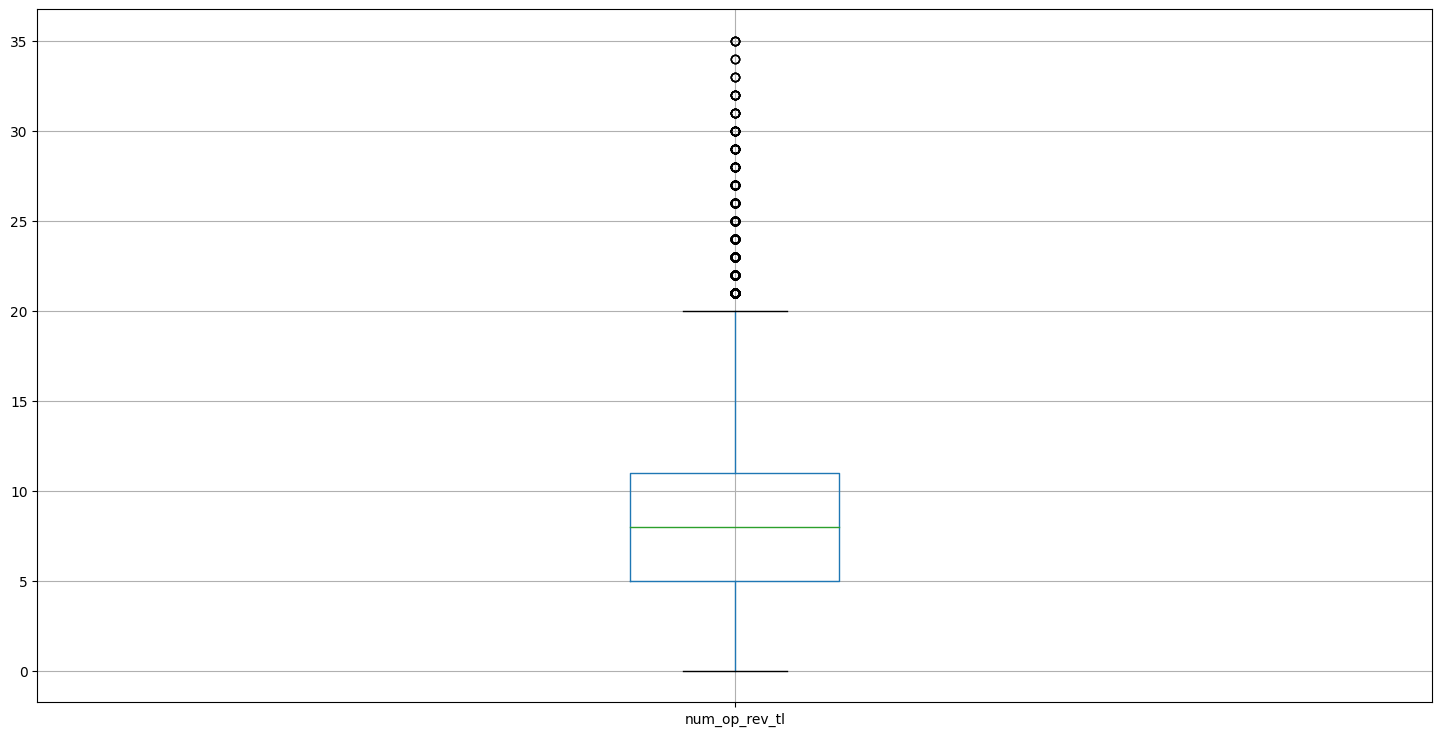

In [31]:
num_cols = ['num_op_rev_tl']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'annual_inc'}>],
       [<Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'mths_since_recent_inq'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'bc_open_to_buy'}>,
        <Axes: title={'center': 'bc_util'}>,
        <Axes: title={'center': 'num_op_rev_tl'}>]], dtype=object)

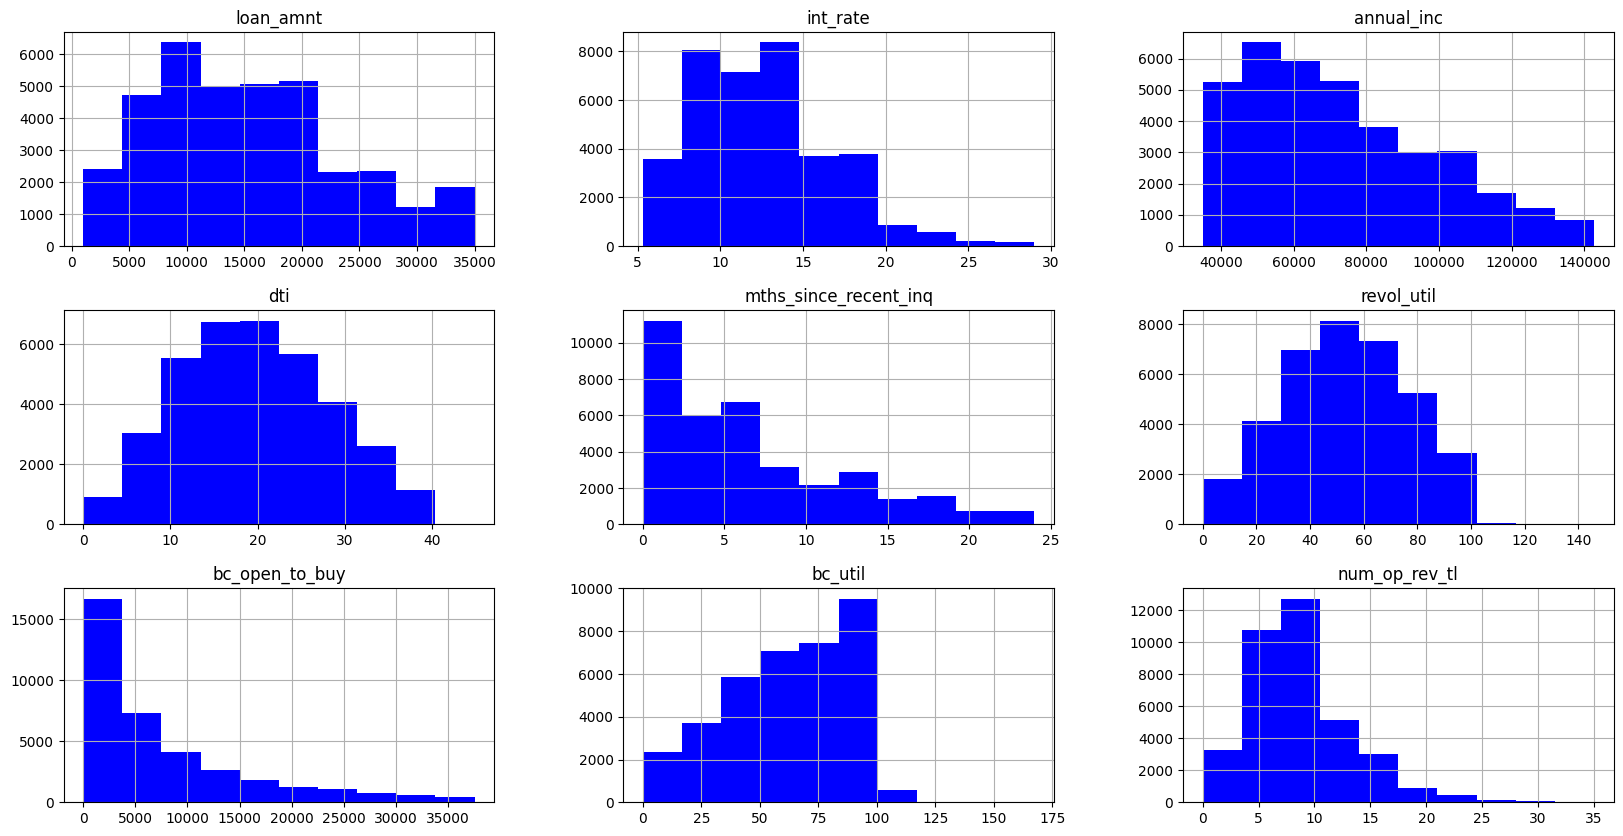

In [32]:
loans.hist(bins = 10, figsize = (20,10), color = 'b')

Outliers have been effectively addressed, and now let's focus on addressing skewness!

To identify and handle skewness, you can follow this general guideline:

If the skewness falls between -0.5 and 0.5, the data is reasonably symmetrical.
If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data has moderate skewness.
If the skewness is less than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
Skewness comes in two forms:

Positive Skewness: This occurs when the right tail of the distribution is longer, resulting in the mean and median being greater than the mode.
Negative Skewness: This happens when the left tail of the distribution is longer than the right tail, causing the mean and median to be less than the mode.
When dealing with distribution transformations, you may encounter these techniques:

Normalization: Use this when your data doesn't follow a Gaussian (normal) distribution. Normalization ensures that roughly equal observations fall above and below the mean, with the mean and median being the same. It's valuable when your data has varying scales and your algorithm doesn't assume a specific data distribution, like k-nearest neighbors and artificial neural networks. Normalization is necessary for techniques that assume normal distribution, such as t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA), and Gaussian Naive Bayes.

Standardization: Apply this when your data approximates a Gaussian distribution. It transforms your data to have a mean of 0 and a standard deviation of 1. While it doesn't strictly require a Gaussian distribution, it's more effective when your data's attributes follow a Gaussian distribution. Standardization is crucial for algorithms that assume Gaussian data distribution, such as linear regression, logistic regression, and linear discriminant analysis. It's widely used in SVM, logistic regression, and neural networks.

To achieve these results, you can use basic methods like log transformation or more advanced ones like the Box-Cox transformation, which helps convert highly skewed distributions into more normal ones.

Before taking any action, it's essential to review skewness both before and after outlier handling. You can utilize tools like Pandas profiling for this purpose. Here's a summary of skewness values before and after outlier removal:

Loan_amnt: 0.75 → 0.73
int_rate: 0.76 → 0.77
annual_inc: 490 → 0.71
dti: 29 → 0.22
mths_since_recent_nq: 0.89 → 0.89
revol_util: 0.01 → 0.03
bc_open_to_buy: 3.74 → 1.48
bc_util: 0.27 → 0.34
num_op_rev_tl: 1.53 → 1.25
Most of the distributions now exhibit fairly symmetrical or moderately skewed behavior. At this stage, specific modifications are not necessary, but it's worth considering during model training in the subsequent series.

In [33]:
# dropping passed columns
loans.drop(["bc_util", "bc_open_to_buy","int_rate"], axis = 1, inplace = True)
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,mths_since_recent_inq,revol_util,num_op_rev_tl
0,3600,36 months,C4,leadman,10+ years,MORTGAGE,55000,Fully Paid,PA,6,4,30,4
2,20000,60 months,B4,truck driver,10+ years,MORTGAGE,63000,Fully Paid,IL,11,10,56,4
4,10400,60 months,F1,Contract Specialist,3 years,MORTGAGE,104433,Fully Paid,PA,25,1,64,7
7,20000,36 months,B1,road driver,10+ years,MORTGAGE,85000,Fully Paid,SC,18,8,6,3
8,10000,36 months,A2,SERVICE MANAGER,6 years,RENT,85000,Fully Paid,PA,13,1,34,13


**Categorical Features**

So far, we have looked into numeric features, now let’s work with categorical features. These require a different approach which we will review in this chapter.

Why do I need to handle categorical features and what are the options?

Machines do not understand textual data, and we need to convert textual data into numbers for the machine to process it. These are the two most popular techniques:

Ordinal Encoding. It refers to converting the labels into numeric form and it is applied when the feature is ordinal, which means there is a clear ordering of the categories and there is a an order of magnitude. For example, your feature is education, and the values of it represent increasing magnitude — a primary school, high school and university. You can still keep it as one feature, and encode it as primary school = 1, high school = 2, and university = 3. Or another example is spiciness:

One-Hot Encoding. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Apply one-hot encoding when the categorical feature is not ordinal. For example, your feature is the zip code of a city, New York, Washington, San Francisco. With one-hot, New York will become a separate column with a flag of 0 or 1 whenever it is applicable and similarly for other cities. Note, this method is memory conscious and may result in high data sparsity. Below you can see a graphical example of colors:

How do I deal with this type of data?

There are multiple solutions available, for example, simpler python function replace() can help to replace textual data with numbers for ordinal encoding, or pandas get_dummies for one-hot encoding. There are more complex libraries like SciKit Learn, as well as there are more advanced ML packages that have categorical features handling out of the box while fitting a model.

Since we haven’t run our high-level analysis over categorical features, let’s do that before data manipulation. Pandas profile is very helpful to get a quick overview of all categorical features:

Following our logic of ordinal and one-hot encoding, we may split our features as follows:

Ordinal encoding for [term], [sub_grade], [emp_length]:

# Label Grooming

In [34]:
cleaner_app_type = {"term": {" 36 months": 1.0, " 60 months": 2.0},
                    "sub_grade": {"A1": 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0,
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
loans = loans.replace(cleaner_app_type)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36514 entries, 0 to 55583
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              36514 non-null  float64
 1   term                   36514 non-null  float64
 2   sub_grade              36514 non-null  float64
 3   emp_title              36514 non-null  object 
 4   emp_length             36514 non-null  float64
 5   home_ownership         36514 non-null  object 
 6   annual_inc             36514 non-null  float64
 7   loan_status            36514 non-null  object 
 8   addr_state             36514 non-null  object 
 9   dti                    36514 non-null  float64
 10  mths_since_recent_inq  36514 non-null  float64
 11  revol_util             36514 non-null  float64
 12  num_op_rev_tl          36514 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.9+ MB


**How do I analyze label outcomes**
In this part, we will try to understand what causes loan applicants not to pay their loans back to the lender. Before this analysis, we need to clean up the ground truth label.

So far we were talking about features. Features are input data, while the label is output. For example, for a given loan application — features or inputs are employment length, debt history, credit score, etc, whereas the label/ or model output is the answer either applicant will pay the loan in full or charge off.

Our label — loan_status, includes the following outcomes now:

In [35]:
loans['loan_status'].value_counts()

Fully Paid            24952
Charged Off            6962
Current                4277
Late (31-120 days)      201
In Grace Period          86
Late (16-30 days)        36
Name: loan_status, dtype: int64

In [36]:
array = ['Charged Off', 'Fully Paid']
loans = loans.loc[loans['loan_status'].isin(array)]
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,mths_since_recent_inq,revol_util,num_op_rev_tl
0,3600,1,24,leadman,10,MORTGAGE,55000,Fully Paid,PA,6,4,30,4
2,20000,2,14,truck driver,10,MORTGAGE,63000,Fully Paid,IL,11,10,56,4
4,10400,2,51,Contract Specialist,3,MORTGAGE,104433,Fully Paid,PA,25,1,64,7
7,20000,1,11,road driver,10,MORTGAGE,85000,Fully Paid,SC,18,8,6,3
8,10000,1,2,SERVICE MANAGER,6,RENT,85000,Fully Paid,PA,13,1,34,13


In [37]:
cleaner_app_type1 = {"loan_status": { "Fully Paid": 1.0, "Charged Off": 0.0}}
loans = loans.replace(cleaner_app_type1)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31914 entries, 0 to 55581
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              31914 non-null  float64
 1   term                   31914 non-null  float64
 2   sub_grade              31914 non-null  float64
 3   emp_title              31914 non-null  object 
 4   emp_length             31914 non-null  float64
 5   home_ownership         31914 non-null  object 
 6   annual_inc             31914 non-null  float64
 7   loan_status            31914 non-null  float64
 8   addr_state             31914 non-null  object 
 9   dti                    31914 non-null  float64
 10  mths_since_recent_inq  31914 non-null  float64
 11  revol_util             31914 non-null  float64
 12  num_op_rev_tl          31914 non-null  float64
dtypes: float64(10), object(3)
memory usage: 3.4+ MB


In [38]:
loans['loan_status'].value_counts()

1    24952
0     6962
Name: loan_status, dtype: int64

About 80% of the remaining loans have been fully paid and 20% have been charged off, so we have a somewhat unbalanced classification problem:

A balanced dataset means our dataset has positive values which are approximately the same as negative values (eg ~50%:50%). Then we can say our dataset is in balance.

An imbalanced dataset means there is a high difference between the positive values and negative values. The main challenge with imbalanced dataset prediction is how accurately we are predicting both majority and minority classes. We will review this in more detail in the next article.

<Axes: xlabel='home_ownership', ylabel='count'>

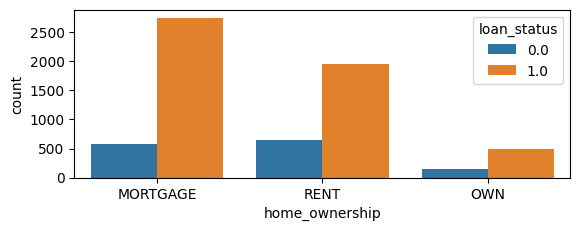

In [ ]:
plt.subplot(2, 1, 1)
sns.countplot(x='home_ownership', data=loans, hue='loan_status')

**Home ownership analize label behavior**

In [39]:
analyse_home_ownership = loans.groupby(['home_ownership','loan_status'])['loan_status'].count()
analyse_home_ownership = analyse_home_ownership.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_home_ownership

<ipython-input-39-50f464ff5598>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  analyse_home_ownership = analyse_home_ownership.groupby(level=0).apply(lambda x:


home_ownership  loan_status
ANY             1             100
MORTGAGE        0              19
                1              81
OWN             0              23
                1              77
RENT            0              25
                1              75
Name: loan_status, dtype: float64

We observe that applicants who rent rather than own their properties are 15–30% more likely to charge off compared to those who have a mortgage or own a property.

There are other types of analysis we can use in addition, that can help us with model interpretation at a later stage. For example, we could see job titles that are most frequently ending up not paying a loan:

In [40]:
loans['emp_title'].nunique()

15156

In [41]:
emp_title_data = loan['emp_title'].value_counts()[:20]

In [42]:
loan_emp_title = loan.loc[loan['loan_status'] =='Fully Paid']
loan_emp_title.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600,3600,3600,36 months,14,123,C,C4,leadman,10+ years,MORTGAGE,55000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,6,0,Aug-2003,675,679,1,30,NaN,7,0,2765,30,13,w,0,0,4422,4422,3600,822,0,0,0,Jan-2019,123,NaN,Mar-2019,564,560,0,30,1,Individual,NaN,NaN,NaN,0,722,144904,2,2,0,1,21,4981,36,3,3,722,34,9300,3,1,4,4,20701,1506,37,0,0,148,128,3,3,1,4,69,4,69,2,2,4,2,5,3,4,9,4,7,0,0,0,3,77,0,0,0,178050,7746,2400,13734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700,24700,24700,36 months,12,820,C,C1,Engineer,10+ years,MORTGAGE,65000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16,1,Dec-1999,715,719,4,6,NaN,22,0,21470,19,38,w,0,0,25680,25680,24700,980,0,0,0,Jun-2016,926,NaN,Mar-2019,699,695,0,NaN,1,Individual,NaN,NaN,NaN,0,0,204396,1,1,0,1,19,18005,73,2,3,6472,29,111800,0,0,6,4,9733,57830,27,0,0,113,192,2,2,4,2,NaN,0,6,0,5,5,13,17,6,20,27,5,22,0,0,0,2,97,8,0,0,314017,39475,79300,24667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000,20000,20000,60 months,11,433,B,B4,truck driver,10+ years,MORTGAGE,63000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341763,NaN,home_improvement,NaN,6

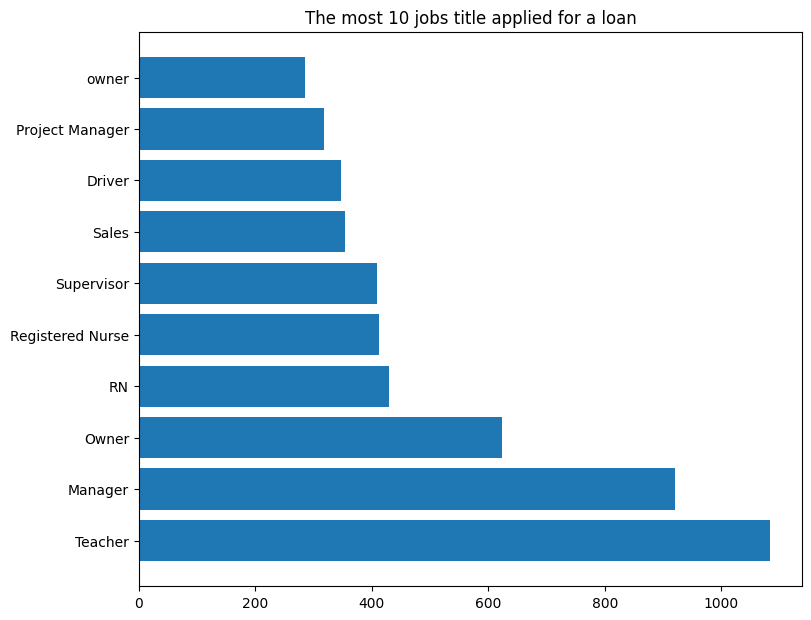

In [43]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
plt.barh(loan_emp_title.emp_title.value_counts()[:10].index, loan.emp_title.value_counts()[:10])
plt.title("The most 10 jobs title applied for a loan")
plt.tight_layout()

Analyzing in this situation holds significant importance as it enhances our comprehension of the business scenario, provides greater interpretability, and facilitates the explanation of results. It can be seamlessly integrated into the business domain as an extra layer of business logic to safeguard the company, or employed in the model evaluation phase to construct an improved model.

In [44]:
#convert annual_inc to integer data type

loans = loans.astype({"home_ownership":'category', "addr_state":'category'})
loans.dtypes

loan_amnt                 float64
term                      float64
sub_grade                 float64
emp_title                  object
emp_length                float64
home_ownership           category
annual_inc                float64
loan_status               float64
addr_state               category
dti                       float64
mths_since_recent_inq     float64
revol_util                float64
num_op_rev_tl             float64
dtype: object

In [45]:
cat_columns = ["home_ownership", "addr_state"]
#create a new DataFrame for our processed data
loans = pd.get_dummies(loans, prefix_sep="__",
                              columns=cat_columns)
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,home_ownership__ANY,home_ownership__MORTGAGE,home_ownership__OWN,home_ownership__RENT,addr_state__AK,addr_state__AL,addr_state__AR,addr_state__AZ,addr_state__CA,addr_state__CO,addr_state__CT,addr_state__DC,addr_state__DE,addr_state__FL,addr_state__GA,addr_state__HI,addr_state__IL,addr_state__IN,addr_state__KS,addr_state__KY,addr_state__LA,addr_state__MA,addr_state__MD,addr_state__ME,addr_state__MI,addr_state__MN,addr_state__MO,addr_state__MS,addr_state__MT,addr_state__NC,addr_state__ND,addr_state__NE,addr_state__NH,addr_state__NJ,addr_state__NM,addr_state__NV,addr_state__NY,addr_state__OH,addr_state__OK,addr_state__OR,addr_state__PA,addr_state__RI,addr_state__SC,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,3600,1,24,leadman,10,55000,1,6,4,30,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,2,14,truck driver,10,63000,1,11,10,56,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10400,2,51,Contract Specialist,3,104433,1,25,1,64,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,20000,1,11,road driver,10,85000,1,18,8,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,10000,1,2,SERVICE MANAGER,6,85000,1,13,1,34,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.2 MB/s eta 0:00:00


# Bivariate Analysis

What is the bi-variate analysis and why do I care?

Bivariate analysis is used to find out if there is a relationship/ correlation between two sets of variables.

Using these correlations, you can get insights such as:

One or multiple variables depend on another variable that may cause multicollinearity;
Indication of the presence of a causal relationship, where correlation can help in predicting one variable from another;
Gaining business-level insights on what factors are causing the label outcome, in our case, how each feature impacts loan payment outcome.
When the dataset has a high positive or negative correlation then there is a high chance that the performance of the model will be impacted by a problem called “Multicollinearity”.

Highly-correlated features may provide the same information, which makes them redundant. In cases like these, it can lead to skewed or misleading results, and to cure this problem we can keep just one feature and remove the redundant features without losing any information. Less redundant data means less opportunity for the model to make noise-based predictions.

Decision trees and boosted trees algorithms are immune to multicollinearity. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model. (Ref.)

How do I deal with multicollinearity?

There are multiple ways to deal with this problem. The easiest way to detect highly correlated features is to use Pearson correlation, and delete one of the perfectly (~ 90%) correlated features. Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA). It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while keeping as much of the data’s variation as possible.

Pandas profiling is going to help us on this occasion too. If you scroll down towards the end of the report you’ll find two sections — “Interactions” and “Correlations”. Correlations will help you to quickly figure out the relationship between variables, you can also select different types of correlations. Pearson is one of the most popular ones.

Possible correlations range is from +1 to –1, where:

zero correlation indicates that there is no relationship between the variables;
correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down;
correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
We can observe the following highly correlated features:

Customer Feature Information. bc_open_to_buy/num_op_rev_tl. Both of these features are related to revolving accounts and bank cards, and hence these are highly correlated, to avoid multicolinieratiry issues, let's drop bc_open_to_buy feature in our initial model. revol_util/bc_util. It is a similar case, and we can drop bc_util feature.
Loan Feature Information. Interest rate is a derivative of sub_grade based on lending club proprietary model, hence they are highly correlated, let’s drop int_rate. Term, sub_grade, loan_amount are correlated too, but lesser, and we prefer to keep those.

In [47]:
analyse_sub_grade = loans.groupby(['sub_grade','loan_status'])['loan_status'].count()
analyse_sub_grade = analyse_sub_grade.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
analyse_sub_grade

<ipython-input-47-ea43a6a454a4>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  analyse_sub_grade = analyse_sub_grade.groupby(level=0).apply(lambda x:


sub_grade  loan_status
1          0              3
           1             97
2          0              4
           1             96
3          0              4
           1             96
4          0              7
           1             93
5          0              8
           1             92
11         0             10
           1             90
12         0             12
           1             88
13         0             14
           1             86
14         0             16
           1             84
15         0             17
           1             83
21         0             21
           1             79
22         0             19
           1             81
23         0             26
           1             74
24         0             26
           1             74
25         0             28
           1             72
31         0             30
           1             70
32         0             36
           1             64
33         0             

In [48]:
analyse_sub_grade = analyse_sub_grade.unstack()

<Axes: xlabel='sub_grade'>

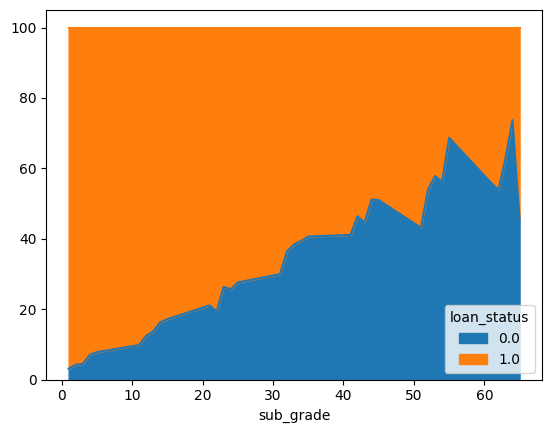

In [49]:
analyse_sub_grade.plot.area()


The sub-grade assigned to loans considers both the applicant's credit score and a combination of various credit risk indicators obtained from the credit report. This pre-evaluation takes a comprehensive approach to assess applicant risk, leading to a noticeable and robust correlation between sub-grades and the outcome of loan status.

**'annual_inc' vs 'loan_status'**

The hypothesis we ask ourself — are applicants with lower income ending up not paying loans back more frequenlty than the ones with higher income? To find out this, let’s aggregate income data into salary bins and overlay the number of applicant with the loan_status:

In [50]:
bins = [30000, 50000, 70000, 90000, 110000, 130000, 150000]
labels = ['30-50k', '50-70k', '70-90k', '90-110k','110-130k','130-150k']
loans['binned'] = pd.cut(loans['annual_inc'], bins=bins, labels=labels)
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,home_ownership__ANY,home_ownership__MORTGAGE,home_ownership__OWN,home_ownership__RENT,addr_state__AK,addr_state__AL,addr_state__AR,addr_state__AZ,addr_state__CA,addr_state__CO,addr_state__CT,addr_state__DC,addr_state__DE,addr_state__FL,addr_state__GA,addr_state__HI,addr_state__IL,addr_state__IN,addr_state__KS,addr_state__KY,addr_state__LA,addr_state__MA,addr_state__MD,addr_state__ME,addr_state__MI,addr_state__MN,addr_state__MO,addr_state__MS,addr_state__MT,addr_state__NC,addr_state__ND,addr_state__NE,addr_state__NH,addr_state__NJ,addr_state__NM,addr_state__NV,addr_state__NY,addr_state__OH,addr_state__OK,addr_state__OR,addr_state__PA,addr_state__RI,addr_state__SC,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY,binned
0,3600,1,24,leadman,10,55000,1,6,4,30,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,50-70k
2,20000,2,14,truck driver,10,63000,1,11,10,56,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50-70k
4,10400,2,51,Contract Specialist,3,104433,1,25,1,64,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,90-110k
7,20000,1,11,road driver,10,85000,1,18,8,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70-90k
8,10000,1,2,SERVICE MANAGER,6,85000,1,13,1,34,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,70-90k


In [51]:
analyse_income = loans.groupby(['binned','loan_status'])['loan_status'].count()
analyse_income

binned    loan_status
30-50k    0              1713
          1              5737
50-70k    0              2322
          1              7686
70-90k    0              1528
          1              5456
90-110k   0               808
          1              3425
110-130k  0               459
          1              2061
130-150k  0               132
          1               587
Name: loan_status, dtype: int64

We can see charged off and paid back applicants for each income bin, however, it’s hard to see the trend from one bin to another by just using the observation count. Let’s rather use proportional weight across each bin.

In [52]:
analyse_income = analyse_income.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_income

<ipython-input-52-22c3a769699a>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  analyse_income = analyse_income.groupby(level=0).apply(lambda x:


binned    loan_status
30-50k    0             23
          1             77
50-70k    0             23
          1             77
70-90k    0             22
          1             78
90-110k   0             19
          1             81
110-130k  0             18
          1             82
130-150k  0             18
          1             82
Name: loan_status, dtype: float64

In [53]:
analyse_income = analyse_income.unstack()
analyse_income

loan_status,0,1
binned,,
30-50k,23,77
50-70k,23,77
70-90k,22,78
90-110k,19,81
110-130k,18,82
130-150k,18,82


<Axes: xlabel='binned'>

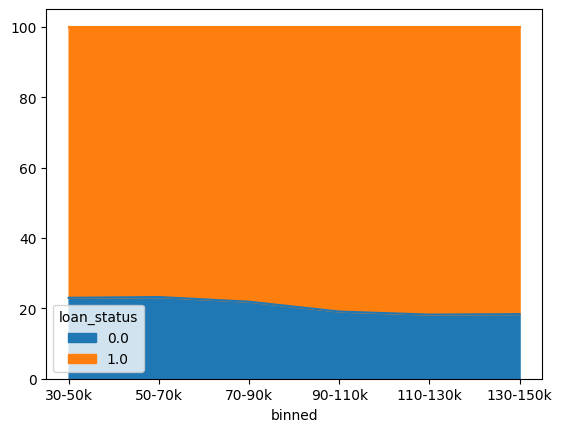

In [54]:
analyse_income.plot.area()


Okay, this is an improvement. We can clearly observe a direct connection between the applicant's income and their loan status. When income is lower, the likelihood of the applicant not repaying the loan increases significantly—almost 1.5 times more likely! These findings can provide valuable insights to loan officers, helping them comprehend the varying levels of risk associated with different applicant segments and characteristics. This information could be leveraged by loan officers to establish additional business rules aimed at mitigating company risks.

emp_length' vs 'loan_status'
One more assumption to validate is: Does employment length affect the likelihoodness of applicant to pay the loan back? We may hypothesise that people in early of their career may not be able to pay loans back due to their early curve difficulties, let’s find out if this is true:

In [55]:
analyse_emp_length = loans.groupby(['emp_length','loan_status'])['loan_status'].count()
analyse_emp_length = analyse_emp_length.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_emp_length

<ipython-input-55-42de6a50b440>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  analyse_emp_length = analyse_emp_length.groupby(level=0).apply(lambda x:


emp_length  loan_status
0           0             22
            1             78
1           0             22
            1             78
2           0             21
            1             79
3           0             23
            1             77
4           0             22
            1             78
5           0             22
            1             78
6           0             23
            1             77
7           0             21
            1             79
8           0             21
            1             79
9           0             24
            1             76
10          0             21
            1             79
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

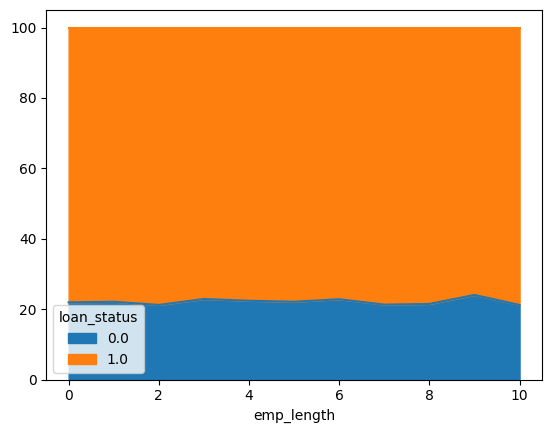

In [56]:
analyse_emp_length = analyse_emp_length.unstack()
analyse_emp_length.plot.area()

dti' vs 'loan_status'
How does existing applicant debt impact loan_status outcome? Are applicants with more debt and less income more likely to charge off?

In [57]:
analyse_dti = loans.groupby(['dti','loan_status'])['loan_status'].count()
loans['dti'].unique()

array([ 5.91, 10.78, 25.37, ...,  3.88,  2.88,  0.98])

In [58]:
binsdti = [1, 10, 20, 30, 40, 50]
labelsdti = ['1-10', '10-20', '20-30','30-40','40-50']
loans['binneddti'] = pd.cut(loans['dti'], bins=binsdti, labels=labelsdti)


analyse_dti = loans.groupby(['binneddti','loan_status'])['loan_status'].count()
analyse_dti = analyse_dti.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_dti

<ipython-input-58-bf964c4d10f4>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  analyse_dti = analyse_dti.groupby(level=0).apply(lambda x:


binneddti  loan_status
1-10       0             15
           1             85
10-20      0             19
           1             81
20-30      0             25
           1             75
30-40      0             32
           1             68
40-50      0             20
           1             80
Name: loan_status, dtype: float64

<Axes: xlabel='binneddti'>

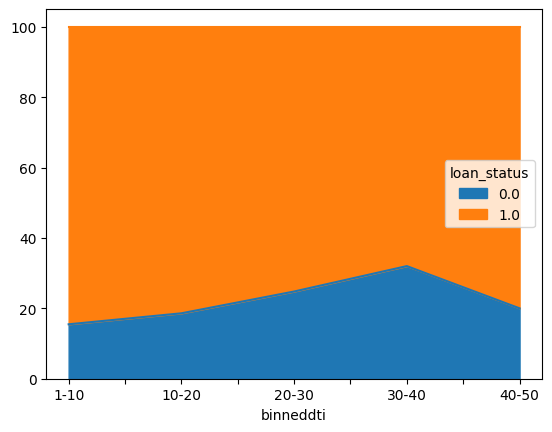

In [59]:
analyse_dti = analyse_dti.unstack()
analyse_dti.plot.area()

Applicants with up to 20% of DTI are paying loans back more frequently. Comparing low DTI with high DTI applicants, we can see that high DTI applicants are up to 200% more likely to charge off!

**Train/Test Split**

In [60]:
loans.drop(["emp_title", "binned","binneddti"], axis = 1, inplace = True)

In [61]:
X = loans.drop('loan_status', axis=1)
y = loans[['loan_status']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Logistic Regression Model
Sklearn library is one of the most popular package that helps us to fit a Logistic Regression model:

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


# Conclusion

We have completed the first part of Fintech Project. Given the the dataset is prepared, we are ready to move on to the next phase of project, which involves model fitting and interpretability, where we are planning to start with a simple but effective model: Logistic Regression using loan_status as the predicted label and the remaining features to find the dependency for the prediction.